---
## **Remove bias for the ground truth unlabeled datasets used for navigation experiments**
---

<font size="2">Eudald Sangenis  

The objective of this file is to remove the bias of the ground truth unlabeled datasets used for navigation experiments.

Parameters High Dimensional Dataset:  
- type_dataset: train, test 
- data_dataset:  2022_03_17 (Subject I), 2022_04_25 (Subject II), 2022_07_27 (Subject III)
</font>

---
## **<font size="5">1. Libraries: </font>**
---

In [ ]:
import os
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt

# Get the current working directory
current_directory = os.getcwd()

---
## **<font size="5">2. Parameters to modify</font>**
---

In [ ]:
type_dataset = 'exp1000'       
data_dataset = '2023_08_30' # 2023_08_23 (Subject II), 2023_08_30 (Subject III), 2023_09_07 (Subject I)

In [ ]:
# Folder to read the labeled and HD datasets:
dataset_path_unlabeled = current_directory+'\\datasets\\'+data_dataset+'\\'
# Folder to save HD datsets:
save_dataset_path = current_directory+'\\datasets\\'+data_dataset+'\\'

---
## **<font size="5">3. Load datasets:</font>**
---

In [113]:
print('Reading dataset '+data_dataset+' ...')
# Load the HD dataset
df   = pd.read_csv(dataset_path_unlabeled +'6sig_'+type_dataset+'.csv')
print('Reading done!')

if 'Unnamed: 0' in df:   df   = df.drop(['Unnamed: 0'], axis=1)

print('Shapes df:')
print(df.shape)

Reading dataset 2023_08_30 ...
Reading done!
Shapes df:
(61709, 6)


In [114]:
df.head(2)

,acc1,acc2,acc3,gyro1,gyro2,gyro3
0,0.008516,0.036222,-0.985916,-0.000105,-0.003026,-0.019662
1,0.008699,0.036996,-0.980914,-0.001046,-0.002976,-0.020033


---
## **<font size="5">4. Remove Bias:</font>**
---

<font size="2">Compute the bias of the first 800 values (1s) of the labeled datset:</font>

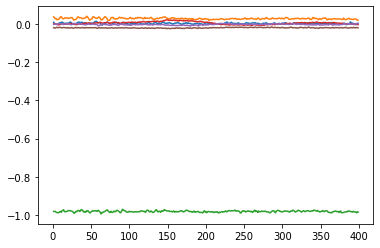

In [115]:
plt.plot(df.index[1:400],  df[['acc1','acc2','acc3','gyro1','gyro2','gyro3']].iloc[1:400])

In [116]:
bias_acc_1 = np.mean(df['acc1'].iloc[1:400])
bias_acc_2 = np.mean(df['acc2'].iloc[1:400])
bias_acc_3 = np.mean(df['acc3'].iloc[1:400])
bias_gyr_1 = np.mean(df['gyro1'].iloc[1:400])
bias_gyr_2 = np.mean(df['gyro2'].iloc[1:400])
bias_gyr_3 = np.mean(df['gyro3'].iloc[1:400])
[bias_acc_1, bias_acc_2, bias_acc_3, bias_gyr_1, bias_gyr_2, bias_gyr_3]

[0.0022877184757280596,
 0.027494923515574015,
 -0.9809607748523494,
 0.004230553884711776,
 -0.0031635213032581372,
 -0.020588453634085197]

<AxesSubplot:>

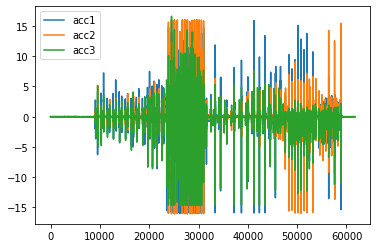

In [117]:
df['acc1'] = df['acc1'] - bias_acc_1
df['acc2'] = df['acc2'] - bias_acc_2
df['acc3'] = df['acc3'] - bias_acc_3
df['gyro1'] = df['gyro1'] - bias_gyr_1
df['gyro2'] = df['gyro2'] - bias_gyr_2
df['gyro3'] = df['gyro3'] - bias_gyr_3

df.plot(y = ['acc1', 'acc2', 'acc3'], use_index = True)

<AxesSubplot:>

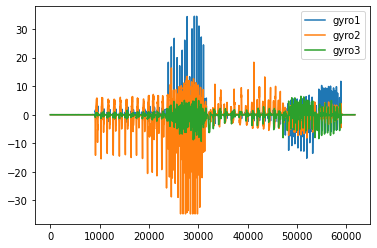

In [118]:
df.plot(y = ['gyro1', 'gyro2', 'gyro3'], use_index = True)

In [119]:
df.to_csv(save_dataset_path +'6sig_'+type_dataset+'_no_Bias.csv', index=None, mode='a')

In [120]:
df

,acc1,acc2,acc3,gyro1,gyro2,gyro3
0,0.006228,0.008727,-0.004955,-0.004336,0.000138,0.000926
1,0.006411,0.009501,0.000046,-0.005277,0.000188,0.000555
2,0.000045,0.004815,0.000036,-0.003813,0.000752,-0.000797
3,-0.003897,-0.000379,0.000209,-0.003494,0.002532,-0.001782
4,-0.002400,0.000924,-0.003172,-0.005712,0.001452,0.000397
...,...,...,...,...,...,...
61704,-0.011231,0.007963,0.003663,-0.000272,-0.006090,0.002084
61705,-0.012647,0.010438,0.000678,0.000244,-0.005344,0.002034
61706,-0.013900,0.008044,0.000617,0.001961,-0.003957,0.002030
61707,-0.010834,0.001444,-0.003763,-0.000133,-0.004880,0.003790
